<h1> <center> An introductory notebook to PyTorch module. </center ></h1>

<h3> Setting PyTorch </h3>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.cuda.is_available()


False

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

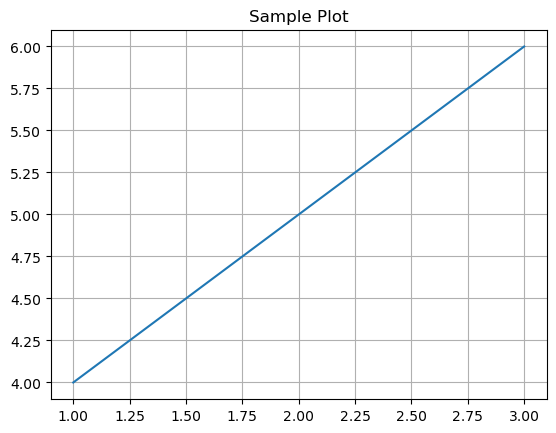

<h3> Basic Operations on PyTorch </h3>

In [2]:
print("Version torch:", torch.__version__)

# Création
a = torch.tensor([1, 2, 3])                    # à partir d'une liste (dtype inféré)
b = torch.arange(0, 9).reshape(3, 3)           # arange + reshape
c = torch.randn(2, 3)                          # aléatoire normale
zeros = torch.zeros(2, 2)
ones = torch.ones(2, 2)
eye = torch.eye(3)
from_numpy = torch.from_numpy(np.array([10, 20, 30]))  # depuis numpy (même mémoire si CPU)

print("a, b, c:", a, b, c, sep="\n")

# Propriétés
print("dtype, device, shape:", c.dtype, c.device, c.shape)

# Indexing & slicing
print("b[0,1]:", b[0, 1])
print("b slice:", b[:, 1:3])

# Reshape / view / flatten / squeeze / unsqueeze
x = torch.arange(12)
print("view reshape:", x.view(3, 4).shape, x.reshape(2, 6).shape)
print("unsqueeze/squeeze:", x.unsqueeze(0).shape, x.unsqueeze(0).squeeze().shape)
print("flatten:", x.flatten().shape)

# Transpose / permute
m = torch.randn(2, 3, 4)
print("permute:", m.permute(2, 0, 1).shape)

# Concat / stack
p1 = torch.randn(2, 3)
p2 = torch.randn(2, 3)
print("cat dim0:", torch.cat([p1, p2], dim=0).shape)
print("stack dim0:", torch.stack([p1, p2], dim=0).shape)

# Arithmétique (élément-wise) et broadcasting
u = torch.tensor([1.0, 2.0, 3.0])
v = torch.tensor([[1.0], [2.0]])
print("u + 1:", u + 1)
print("broadcast add:", u + v)   # broadcasting

# Matmul / @
A = torch.randn(3, 4)
B = torch.randn(4, 2)
print("matmul:", A @ B, "shape:", (A @ B).shape)

# Reductions
t = torch.randn(5, 4)
print("sum, mean, min, max:", t.sum().item(), t.mean().item(), t.min().item(), t.max().item())
print("argmax dim0:", t.argmax(dim=0))

# Comparaisons & masque logique
mask = t > 0
print("mask sum positive:", mask.sum().item())
print("masked select:", t[t > 0])

# In-place ops (attention aux gradients)
z = torch.tensor([1.0, 2.0, 3.0])
z.add_(1.0)   # modifie z
print("in-place add_:", z)

# Clone / detach / requires_grad / backward
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = (x ** 2).sum()
y.backward()            # dy/dx = 2*x
print("grad:", x.grad)

xd = x.detach().clone() # détaché du graphe

# Conversion vers numpy (doit être sur CPU)
arr = x.cpu().detach().numpy()
print("numpy:", arr, type(arr))

# Déplacement device / dtype conversion
if torch.cuda.is_available():
    print("CUDA disponible, envoi sur GPU")
    A_cuda = A.to('cuda')
    A_cpu = A_cuda.to('cpu')

print("astype (float->int):", torch.tensor([1.2, 2.8]).to(torch.int))

# Utilitaires: clamp, round, sort, unique
vals = torch.tensor([-1.5, 0.2, 3.7, 3.7])
print("clamp:", vals.clamp(0, 3))
print("round:", vals.round())
print("unique:", vals.unique())
print("sort:", vals.sort().values)

# Autres utiles: einsum, torch.nn.functional ops
print("einsum (trace):", torch.einsum('ii->', torch.randn(3, 3)))

# Remise à zéro des gradients
x.grad.zero_()

# Exemple rapide résumé
print("Exemple résumé OK")
# ...existing code...

Version torch: 2.9.1+cpu
a, b, c:
tensor([1, 2, 3])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[-0.8073,  0.5935,  0.9673],
        [-0.1903,  0.2044, -0.1103]])
dtype, device, shape: torch.float32 cpu torch.Size([2, 3])
b[0,1]: tensor(1)
b slice: tensor([[1, 2],
        [4, 5],
        [7, 8]])
view reshape: torch.Size([3, 4]) torch.Size([2, 6])
unsqueeze/squeeze: torch.Size([1, 12]) torch.Size([12])
flatten: torch.Size([12])
permute: torch.Size([4, 2, 3])
cat dim0: torch.Size([4, 3])
stack dim0: torch.Size([2, 2, 3])
u + 1: tensor([2., 3., 4.])
broadcast add: tensor([[2., 3., 4.],
        [3., 4., 5.]])
matmul: tensor([[ 0.4739,  0.4555],
        [-0.9184, -2.1857],
        [-0.5198,  3.8290]]) shape: torch.Size([3, 2])
sum, mean, min, max: -3.723116636276245 -0.18615582585334778 -2.5148234367370605 1.3412643671035767
argmax dim0: tensor([2, 1, 2, 0])
mask sum positive: 9
masked select: tensor([0.4465, 0.5806, 1.2030, 0.7499, 0.1512, 1.3413, 0.2629, 0.0161, 0.9